# 0. Install and Import dependencies

Part 1: https://www.youtube.com/watch?v=D9sU1hLT0QY

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:
# Gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch CDR Data

https://www.marketwatch.com/investing/index/wig20?countryCode=XX

In [ ]:
df = pd.read_csv('CDR_v2.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,03/19/2021,220.7,227.0,217.9,223.2,"961,059"
1,03/18/2021,231.0,231.7,220.7,220.7,"634,370"
2,03/17/2021,230.0,232.0,223.1,231.0,"535,624"
3,03/16/2021,233.0,236.1,226.5,229.5,"418,635"
4,03/15/2021,231.0,234.6,225.5,229.9,"523,875"
...,...,...,...,...,...,...
247,03/25/2020,284.0,287.7,272.0,277.6,"382,919"
248,03/24/2020,277.1,280.6,268.3,276.6,"433,759"
249,03/23/2020,257.1,272.0,250.0,265.2,"439,015"
250,03/20/2020,281.0,283.3,256.4,266.5,"934,660"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-19,220.7,227.0,217.9,223.2,"961,059"
2021-03-18,231.0,231.7,220.7,220.7,"634,370"
2021-03-17,230.0,232.0,223.1,231.0,"535,624"
2021-03-16,233.0,236.1,226.5,229.5,"418,635"
2021-03-15,231.0,234.6,225.5,229.9,"523,875"


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) #first 100 records, 
env.prices

array([223.2, 220.7, 231. , 229.5, 229.9, 226.5, 221. , 210.2, 223. ,
       232. , 232. , 235. , 228.3, 241.3, 240.3, 236.6, 251.6, 258.2,
       257.7, 258.1, 265.4, 275. , 271.3, 270.1, 270. , 263. , 270.5,
       269.5, 270. , 286.3, 293.4, 291. , 288. , 283.3, 305.8, 305.2,
       365. , 315.8, 300. , 275.7, 250.1, 253.2, 252.7, 248.2, 253.5,
       256.2, 265. , 249.9, 248.5, 246. , 239.9, 248. , 265.7, 276.4,
       274.7, 280.5, 274. , 269. , 267.7, 256. , 271.4, 309.2, 300. ,
       300. , 296.1, 320.5, 362. , 395.8, 395. , 425.1, 443. , 421. ,
       425. , 406. , 389.5, 362.7, 358.9, 364. , 371.1, 372.6, 372.2,
       368. , 374.5, 369.6, 360.4, 363.4, 372.4, 365.7, 371.4, 383.1,
       371.1, 381.2, 365. , 342.7, 335.4, 354. , 331. , 364.1, 360. ,
       353.5])

# 2.Build Enviroment

info {'total_reward': 182.19999999999996, 'total_profit': 1.2639276588008246, 'position': 1}


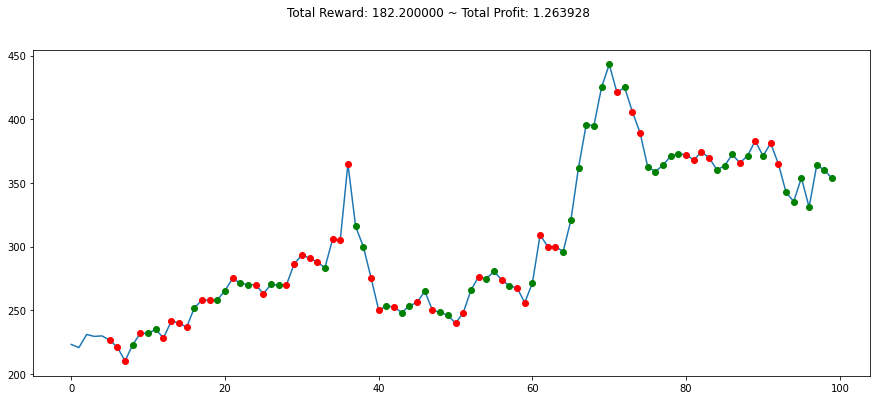

In [ ]:
state = env.reset() #Initial state
while True: #loop
  action = env.action_space.sample() #Random steps (Buy/Sell)
  n_state, reward, done, info, = env.step(action) #Apply action to enviroment
  if done: #95 days of data in our enviroment
    print("info", info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all() #allows to render all trades in our enviroment
plt.show()

# 3. Build Enviroment and Train

In [ ]:
 env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
 env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) #lstm best for stock
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.00182  |
| fps                | 12       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 93.8     |
---------------------------------
---------------------------------
| explained_variance | -0.00144 |
| fps                | 321      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 119      |
---------------------------------
---------------------------------
| explained_variance | 0.000442 |
| fps                | 370     

KeyboardInterrupt: ignored

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)

In [ ]:
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 49.5, 'total_profit': 1.0554689453886341, 'position': 1}


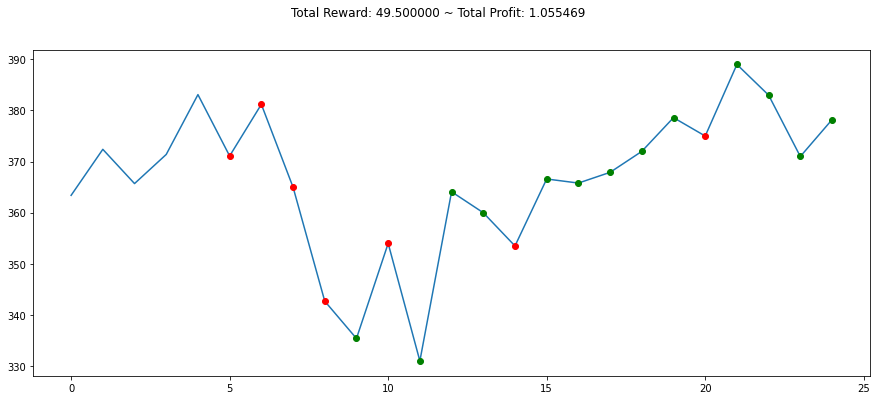

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()